In [9]:
import numpy as np
t = np.load(r"W:\music\mfm\MFM_Synthsizer\data\violin\sustain\table\55.npz",allow_pickle=True)

In [11]:
t['magLocal']

array({'env': [[[0.2545759372075725, 0.33809491259385244, 0.3130404425695256, 0.368742548945715, 0.3791241065133034, 0.4758270623971101, 0.4731249317712108, 0.4699815120116597, 0.2754110643139627, 0.3946412610453478, 0.40430411056510074, 0.4987717096959992, 0.3031602575455986, 0.29811220693224993, 0.3262455045010813, 0.3406124753072711, 0.20104507500095883, 0.29610786043253823, 0.3441469404221744, 0.318782095036524, 0.35937718085916825, 0.31706563451121494, 0.2246741256565063, 0.5010842640721497, 0.24420295803761902, 0.44356053295934716, 0.2932476306017531, 0.4058725161905306, 0.34551514824042406, 0.4254342980959953, 0.3325653369807423, 0.2610838153826059, 0.4396232314267534, 0.30459234650140704, 0.2790099858797401, 0.23563493971949237, 0.23897223424766476, 0.18732261358535604, 0.23377514120738357, 0.29846221099923126, 0.1842169989585936, 0.21987078837589588, 0.22366499224788347, 0.1839176801325957, 0.20570560938145047, 0.11873895356379566, 0.22561156460751786, 0.18408629925622824, 0.2

In [775]:
from pathlib import Path
import soundfile as sf
from matplotlib import pyplot as plt
import librosa
import numpy as np

from data_proc.split import detect_onsets

audio, sr = librosa.load(r'.\data\151VNNVM.WAV')
onsets = detect_onsets(audio,n_fft=64,visualize=True)

segments = np.split(audio,onsets)[1:]

# trim end of segments
segments = [s[:-4000] for s in segments]

# save segments
Path('./data/audio').mkdir(parents=True,exist_ok=True)
for i,s in enumerate(segments[0:13] + segments[19:26] + segments[32:39] + segments[45:]):
    sf.write(f'./data/audio/{55+i}.wav',s,sr)

In [513]:
np.argmin([len(s) for s in segments])

56

In [782]:
pitch = 55
base_freq = 440 * np.power(2, (pitch-69)/12)
print(base_freq)

195.99771799087463


In [776]:
np.savez('./data/table.npz',a={'a1':np.array([1,2,3])})


In [780]:
np.load('./data/table.npz',allow_pickle=True)['a']

array({'a1': array([1, 2, 3])}, dtype=object)

In [546]:
def freq_to_midi(freq):
    return int(np.round(69 + 12 * np.log2(freq / 440)))

freq_to_midi(439)

69

67

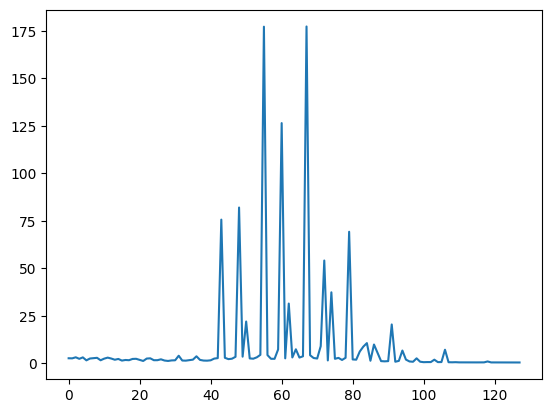

In [756]:
def freq_to_midi(freq):
    return int(np.round(69 + 12 * np.log2(freq / 440)))

def midi_to_freq(midi):
    return 440 * 2 ** ((midi - 69) / 12)

def get_first_peak(seq):
    m = np.max(seq)
    for i,s in enumerate(seq):
        if i < 3 or i == len(seq)-1:
            continue
        if s > m*0.5:
            if seq[i-1] < s and seq[i+1] < s:
                return i
    raise Exception('No peak found')

def get_base_freq(audio,sr):
    audio = audio[:40000]
    fft_freqs = np.fft.rfftfreq(len(audio),1/sr)    
    freq_signal = np.abs(np.fft.rfft(audio))
    fft_freqs_step = fft_freqs[1]-fft_freqs[0]

    # plt.plot(fft_freqs,freq_signal)
    counts = np.zeros(128)
    for pitch in range(128):
        for n in range(5):
            decay = 0.9**n
            bin = int(midi_to_freq(pitch)*n / fft_freqs_step)
            if bin < 0 or bin >= len(freq_signal):
                continue
            counts[pitch] += freq_signal[bin]*decay

    plt.plot(counts)

    return np.argmax(counts)


def get_pitch(audio,sr):
    return freq_to_midi(get_base_freq(audio,sr))

get_base_freq(segments[0],sr)

In [732]:
midi_to_freq(101)

2793.825851464031

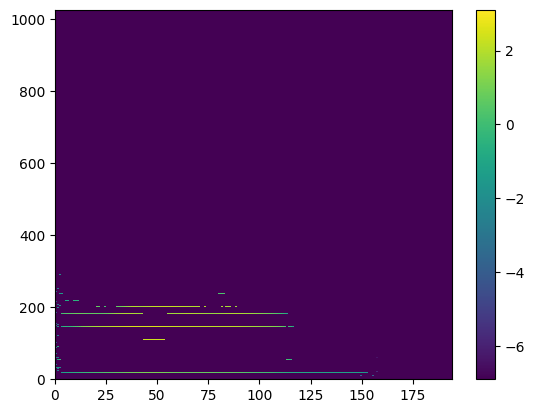

In [565]:
plt.pcolormesh(np.log(0.001+librosa.core.piptrack(y=segments[0],sr=sr,fmin=100,fmax=10000)[1]))
plt.colorbar()
